# Acknowledgement

Many thanks to the references from:

- [Autoencoder 自编码](https://morvanzhou.github.io/tutorials/machine-learning/keras/2-6-autoencoder/)
- [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)

In [2]:
# Program Setup

import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

## Data Preprocessing
1. use MNIST
2. split the data into train, test set
3. normalization
4. reshape the data from (60000, 28, 28) to (60000, 784) as features

In [13]:
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(x_train, _), (x_test, y_test) = mnist.load_data()

# data pre-processing
x_train = x_train.astype('float32') / 255      # normalize all values between 0 and 1
x_test = x_test.astype('float32') / 255         # normalize all values between 0 and 1
print(x_train.shape) # (60000, 28, 28）
print(x_test.shape) # (10000, 28, 28）


x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape) # (60000, 784)
print(x_test.shape) # (10000, 784)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


## Part 1: How to train a full Auto-encoder model?

In [14]:
# connect all layers as Keras suggestes:
input_img = Input(shape=(784,)) # X Layer
encoded = Dense(128, activation='relu')(input_img) # input 784, output 128
encoded = Dense(64, activation='relu')(encoded) # input 128, output 64
encoded = Dense(32, activation='relu')(encoded) # input 64, output 32

decoded = Dense(64, activation='relu')(encoded) # input 32, output 64
decoded = Dense(128, activation='relu')(decoded) # input 64, output 128
decoded = Dense(784, activation='sigmoid')(decoded) # input 128, output 784. Y Layer


# construct and compile the auto-encoder model
autoencoder = Model(input_img, decoded) # decoded is our final connected model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# finally train the model (Keras will help for validation)
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.3327 - val_loss: 0.2647
Epoch 2/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.2603 - val_loss: 0.2564
Epoch 3/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.2521 - val_loss: 0.2454
Epoch 4/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.2368 - val_loss: 0.2262
Epoch 5/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.2194 - val_loss: 0.2087
Epoch 6/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.2043 - val_loss: 0.1982
Epoch 7/100
60000/60000 [==============================] - 6s 107us/step - loss: 0.1966 - val_loss: 0.1914
Epoch 8/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1897 - val_loss: 0.1861
Epoch 9/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.1832 - val_loss:

60000/60000 [==============================] - 6s 96us/step - loss: 0.1061 - val_loss: 0.1044
Epoch 77/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.1060 - val_loss: 0.1043
Epoch 78/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.1057 - val_loss: 0.1037
Epoch 79/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.1054 - val_loss: 0.1050
Epoch 80/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.1052 - val_loss: 0.1041
Epoch 81/100
60000/60000 [==============================] - 9s 149us/step - loss: 0.1050 - val_loss: 0.1049
Epoch 82/100
60000/60000 [==============================] - 8s 135us/step - loss: 0.1047 - val_loss: 0.1040
Epoch 83/100
60000/60000 [==============================] - 8s 128us/step - loss: 0.1045 - val_loss: 0.1028
Epoch 84/100
60000/60000 [==============================] - 7s 108us/step - loss: 0.1043 - val_loss: 0.1036
Epoch 85/100
60000/60000 [=================

## Part 2: Visualize how good is our trained autoencoder model?



`decoder_layer = autoencoder.layers[-1] # retrieve the last layer of the autoencoder model`
only works for single-layer because only last layer is decoder in this case.

See [Stackoverflow](https://stackoverflow.com/questions/44472693/how-to-decode-encoded-data-from-deep-autoencoder-in-keras-unclarity-in-tutorial) for more details.




In [15]:
# encoder part
encoder = Model(input_img, encoded)

# decoder part
encoding_dim = 32
encoded_input = Input(shape=(encoding_dim,)) # Input layers to a `Model` must be `InputLayer` objects, not tensor

decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder) # Keras Tensor

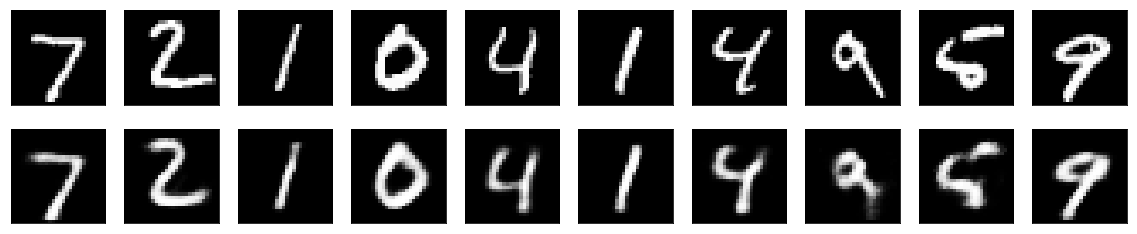

In [17]:
# test on all test data
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# or you may use 
# decoded_imgs = autoencoder.predict(x_test)

# We will only display some(n) of them
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()